### The point is to make the QSVM work faster.

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
X, y = make_classification(n_samples=1000, n_features=5, random_state=137)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=137)

In [5]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       146
           1       0.90      0.92      0.91       154

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [6]:
n_procs = range(2, 20)

In [7]:
time_proc = []
for n_proc in n_procs:
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}   
    tic = time.time()
    grid = GridSearchCV(SVC(probability=True), 
                        param_grid,
                        n_jobs=n_proc,
                        refit=True, verbose=1)
    grid.fit(X_train, y_train)
    toc = time.time()
    time_proc.append(toc-tic)
    print(f'Total time: {toc - tic:.2f} seconds')    

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 2.53 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.91 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.27 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.80 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.28 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.06 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.05 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.04 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.08 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.16 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.24 seconds
Fitting 5 folds for each of 25 candidates, 

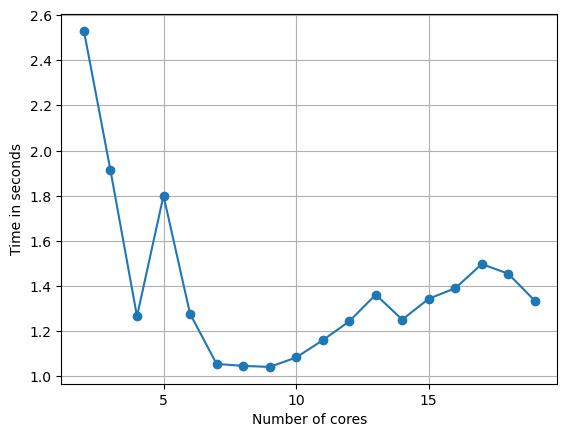

In [8]:
ax = plt.figure().gca()
plt.plot(n_procs, time_proc, '-o')
plt.xlabel('Number of cores')
plt.ylabel('Time in seconds')
plt.grid()
ax.xaxis.get_major_locator().set_params(integer=True);

In [9]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [10]:
grid.best_estimator_

SVC(C=1, gamma=1, probability=True)

In [11]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       146
           1       0.93      0.91      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Quantum Models

In [12]:
X, y = make_classification(1000, 4, random_state=13)

In [13]:
X[0][::-1]

array([ 0.99478782, -1.15013647,  0.54293503, -0.03639866])

In [14]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap

In [17]:
zf = ZZFeatureMap(4, reps=1, entanglement='pairwise')#.decompose()
zf.draw()

┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■───────»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐     »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──■──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──■────────────────────────────────────■──┤ X ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐└───┘»
q_3: ┤ H ├┤ P(2.0*x[3]) ├┤ X ├┤ P(2.0*(π - x[2])*(π - x[3])) ├┤ X ├─────»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘     »
«                                          
«q_0: ─────────────────────────────────────
«                                          
«q_1: ──────────────────────────────────■──
«     ┌──────────────────────────────┐┌─┴─┐
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├
«     └──────────────────────────────┘└───┘
«q_3: ─────────────────────────────────────
«

In [18]:
zf.assign_parameters(dict(
        zip(zf.parameters, X[0][::-1])
    ), inplace=True
)

In [21]:
zf.draw()

┌───┐ ┌─────────────────────┐                                        »
q_0: ┤ H ├─┤ P(1.98957564792519) ├────■───────────────────────────■───────»
     ├───┤ ├─────────────────────┤  ┌─┴─┐┌─────────────────────┐┌─┴─┐     »
q_1: ┤ H ├─┤ P(-2.3002729447698) ├──┤ X ├┤ P(18.4270096301884) ├┤ X ├──■──»
     ├───┤ ├─────────────────────┤  └───┘└─────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├─┤ P(1.08587005811716) ├────■───────────────────────────■──┤ X ├»
     ├───┤┌┴─────────────────────┴─┐┌─┴─┐┌─────────────────────┐┌─┴─┐└───┘»
q_3: ┤ H ├┤ P(-0.0727973288450728) ├┤ X ├┤ P(16.5170227384935) ├┤ X ├─────»
     └───┘└────────────────────────┘└───┘└─────────────────────┘└───┘     »
«                                 
«q_0: ────────────────────────────
«                                 
«q_1: ─────────────────────────■──
«     ┌─────────────────────┐┌─┴─┐
«q_2: ┤ P(22.3054692312736) ├┤ X ├
«     └─────────────────────┘└───┘
«q_3: ────────────────────────────
«

In [22]:
from qiskit.quantum_info import Statevector

In [26]:
%%timeit
state = Statevector.from_int(0, 2**4).evolve(zf)

710 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
state

Statevector([ 0.25      +0.j        ,  0.00094174+0.24999823j,
              0.18577687+0.16729302j, -0.24999836-0.00090584j,
             -0.14898864+0.20075454j, -0.20131435-0.14823135j,
             -0.16910788+0.18412639j,  0.00335888-0.24997743j,
             -0.18524595-0.16788073j,  0.16718172-0.18587703j,
             -0.02531656-0.24871484j,  0.18463644+0.16855084j,
             -0.06025166-0.24263087j,  0.24240218-0.06116522j,
             -0.03462587-0.24759049j,  0.19082743+0.16150817j],
            dims=(2, 2, 2, 2))
